In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import pylab as pl

seaborn.set()

In [2]:
x_data = np.random.random(100)
x_data *= 100
y_data = x_data * 2
for i in range(100):
  y_data[i] += np.random.random() * 100
  
y2 = x_data * 4 - 50

In [3]:
def mean_squared_error(m, b, x_data, y_data):
    num_examples = x_data.size
    J = 0
    
    for i in range(num_examples):
        J += ((m * x_data[i] + b) - y_data[i]) ** 2
  
    J = J / (2 * num_examples)

    return(J)
    
def graph_mean_squared_error_b(x_data, y_data, min_bound = 0, max_bound = 200):
    b_vals = np.array(range(max_bound - min_bound)) + min_bound
    b_errs = [mean_squared_error(1, b, x_data, y_data) for b in b_vals]
    plt.plot(b_vals, b_errs)
    plt.xlabel("Value of b")
    plt.ylabel("Mean squared error calculated with m = 1")

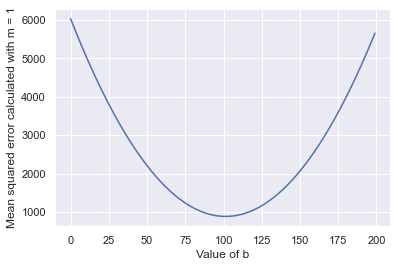

In [4]:
graph_mean_squared_error_b(x_data, y_data)

In [5]:
def grad_at_point(m, b, x_data, y_data):
    num_examples = x_data.size
    grad = np.zeros(2)
    grad[0] = 1 / num_examples * np.sum((m * x_data + b) - y_data)
    grad[1] = 1 / num_examples * np.sum(((m * x_data + b) - y_data) * x_data)
    return(grad)

In [8]:
grad_at_point(1, 50, x_data, y_data)

array([  -45.59065707, -2625.48684233])

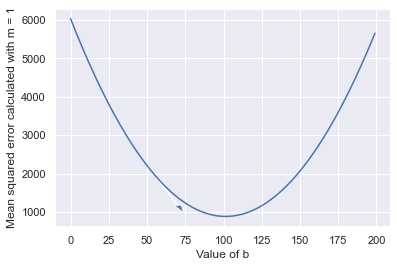

In [6]:
graph_mean_squared_error_b(x_data, y_data)
dx = 20
plt.arrow(
    50, mean_squared_error(1, 50, x_data, y_data), dx, 
    grad_at_point(1, 50, x_data, y_data)[0] * dx, head_width = 5, head_length = 200)

In [7]:
def gradient_descent_b(m, init_b, x_data, y_data, iterations, alpha):
    curr_b = np.copy(init_b).astype(np.float32)
    b_vals = np.zeros(iterations)
    b_grads = []
    for i in range(iterations):
        b_grad = grad_at_point(m, curr_b, x_data, y_data)[0]
        curr_b -= alpha * b_grad
        b_vals[i] = curr_b
        b_grads.append(b_grad) 
    return([curr_b, b_vals, b_grads])

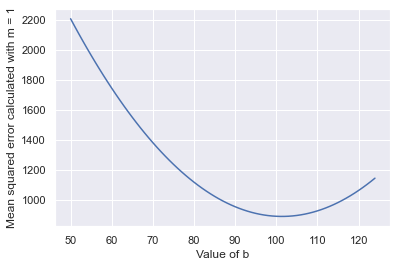

In [8]:
[optimal_b, b_vals, b_grads] = gradient_descent_b(1, 50, x_data, y_data, 10, 0.5)

graph_mean_squared_error_b(x_data, y_data, 50, 125)

In [9]:
print(b_grads, b_vals, optimal_b)

[-51.39258332910769, -25.696294266607687, -12.848149735357683, -6.424077469732684, -3.212041336920184, -1.6060232705139346, -0.8030142373108093, -0.40150972070924684, -0.20075746240846556, -0.10037751856080931] [ 75.69628906  88.54443359  94.96850586  98.18054199  99.78656006
 100.58956909 100.99107361 101.19182587 101.29220581 101.34239197] 101.34239


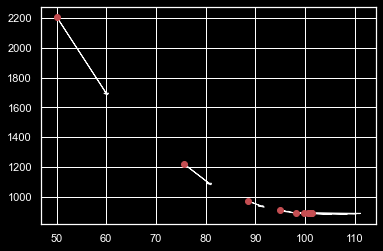

In [15]:
plt.style.use("dark_background")

for i in range(b_vals.size + 1):
    if i == 0:
        b_val = 50
    else:
        b_val = b_vals[i - 1]
    plt.plot(b_val, mean_squared_error(1, b_val, x_data, y_data), "ro")
    if i < b_vals.size:
        dx = 10 * b_grads[i] / b_grads[0]
        plt.arrow(b_val, mean_squared_error(1, b_val, x_data, y_data), dx, b_grads[i] * dx, head_width = 1, head_length = 10)

Text(0, 0.5, 'b')

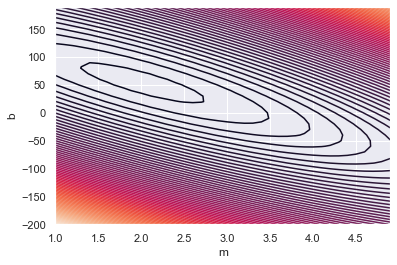

In [14]:
m_vals = np.array(range(40)) / 10 + 1
b_vals = np.array(range(40)) * 10 - 200
J_vals = np.zeros((40,40))
x_3dplot = np.zeros((40,40))
y_3dplot = np.zeros((40,40))

for i in range(m_vals.size):
    for j in range(b_vals.size):
      err = mean_squared_error(m_vals[i], b_vals[j], x_data, y_data)
      J_vals[i][j] = err
      x_3dplot[i][j] = m_vals[i]
      y_3dplot[i][j] = b_vals[j]

x_plot = m_vals
y_plot = b_vals
z_plot = np.transpose(J_vals)

plt.contour(x_plot, y_plot, z_plot, 80)
plt.xlabel("m")
plt.ylabel("b")

Text(0.5, 0, 'J (MSE)')

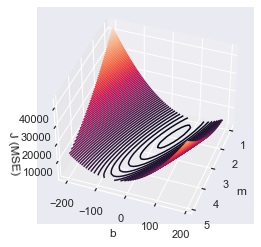

In [15]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(40, 20)

ax.contour3D(x_3dplot, y_3dplot, J_vals, 80)
ax.set_xlabel("m")
ax.set_ylabel("b")
ax.set_zlabel("J (MSE)")

In [16]:
def gradient_descent_all(init_m, init_b, x_data, y_data, iterations, alpha_m, alpha_b):
    curr_m = np.copy(init_m).astype(np.float32)
    curr_b = np.copy(init_b).astype(np.float32)
    vals = np.zeros((iterations + 1, 2))
    grads = []
  
    for i in range(iterations):
      vals[i][0] = curr_m
      vals[i][1] = curr_b
      grad = grad_at_point(curr_m, curr_b, x_data, y_data)
      grads.append(grad)
      curr_m -= alpha_m * grad[1]
      curr_b -= alpha_b * grad[0]

    optimal_params = [curr_m, curr_b]
    vals[iterations][0] = curr_m
    vals[iterations][1] = curr_b

    return([optimal_params, vals, grads])

In [17]:
# really jank, separate learning rates for m and b are used here because I didn't scale/normalize the data at all
[result_1, vals_1, grads_1] = gradient_descent_all(3, 150, x_data, y_data, 50, 0.00008, 0.5)
[result_2, vals_2, grads_2] = gradient_descent_all(1, -200, x_data, y_data, 50, 0.00005, 0.5)
[result_3, vals_3, grads_3] = gradient_descent_all(1, 103, x_data, y_data, 100, 0.0001, 0.5)

print(result_1, result_2, result_3)

[array(2.0364764, dtype=float32), array(52.730957, dtype=float32)] [array(2.032619, dtype=float32), array(52.929844, dtype=float32)] [array(2.0106833, dtype=float32), array(53.90451, dtype=float32)]


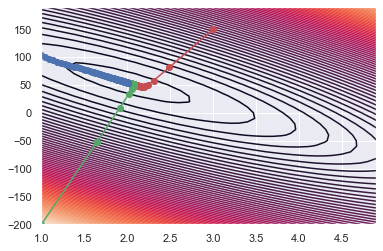

In [18]:
plt.contour(x_plot, y_plot, z_plot, 80)
plt.plot(np.transpose(vals_1)[0], np.transpose(vals_1)[1], "ro-")
plt.plot(np.transpose(vals_2)[0], np.transpose(vals_2)[1], "go-")
plt.plot(np.transpose(vals_3)[0], np.transpose(vals_3)[1], "bo-")

Text(0.5, 0, 'J (MSE)')

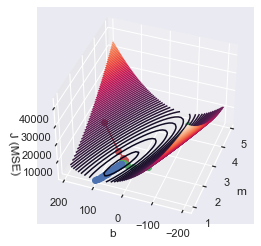

In [19]:
z_vals_1 = [mean_squared_error(vals_1[i][0], vals_1[i][1], x_data, y_data) for i in range(vals_1.shape[0])]
z_vals_2 = [mean_squared_error(vals_2[i][0], vals_2[i][1], x_data, y_data) for i in range(vals_2.shape[0])]
z_vals_3 = [mean_squared_error(vals_3[i][0], vals_3[i][1], x_data, y_data) for i in range(vals_3.shape[0])]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(40, 200)
ax.contour3D(x_3dplot, y_3dplot, J_vals, 80)

ax.plot(np.transpose(vals_1)[0], np.transpose(vals_1)[1], z_vals_1, "ro-")
ax.plot(np.transpose(vals_2)[0], np.transpose(vals_2)[1], z_vals_2, "go-")
ax.plot(np.transpose(vals_3)[0], np.transpose(vals_3)[1], z_vals_3, "bo-")
ax.set_xlabel("m")
ax.set_ylabel("b")
ax.set_zlabel("J (MSE)")

The lowest point has the lowest sum of squared residuals (RSS).

Gradient descent takes big steps when far away, and little steps as it gets closer to the best solution. Once the steps are almost 0 (or a set size), gradient descent will stop.

Then, the derivative d is calculated for each point of the function
- we take the derivative of the loss function